# machine learning exercise
*in this exercies we will be working with titanic dataset to descover patterns and extract information from the data after preprocessing it*

# import libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic = pd.read_csv("/content/titanic.csv")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# preprocessing the data
*in this section we will deal with missing data, standrizing the data and prepare it before the training process*

**missing data**

In [4]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

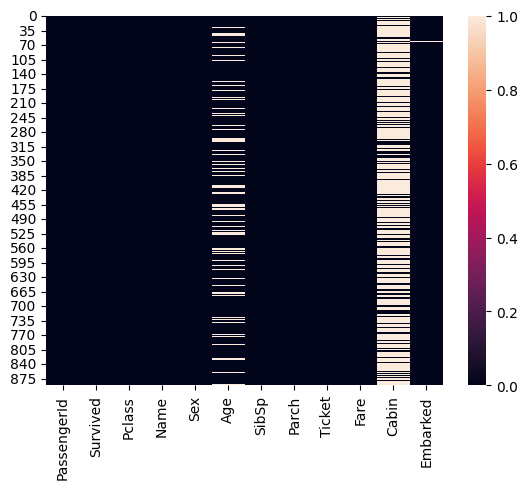

In [5]:
sns.heatmap(titanic.isna()) #visulaze the missing data

In [6]:
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].mean())
#fill the column age from the titanic dataset with it's mean

<Axes: >

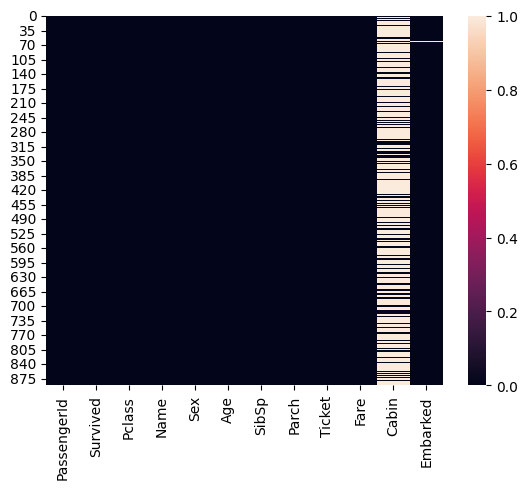

In [7]:
sns.heatmap(titanic.isna())

In [8]:
titanic.drop('Cabin',axis=1 , inplace= True)
#drop this column because we won't need it and it has missing values

In [9]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [10]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


**converting categorical features(encoding)**
*the process of encoding categorical data into 1s and 0s to be easier to work with later on*

In [11]:
titanic['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [12]:
titanic['Embarked'].value_counts()
#where did the passengers come from

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [13]:
#start incodinf with the get dummies function
sex = pd.get_dummies(titanic['Sex'])
sex

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [14]:
sex = pd.get_dummies(titanic['Sex'], drop_first=True)
sex
#we will drop one of the two columns with the drop first function
#because we want the dataset to be as simple as possible
# 1 indecate male, 0 indecate female

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [15]:
emb = pd.get_dummies(titanic['Embarked'])
emb

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


now we want to merge the column we just created into the dataset

In [16]:

titanic ['Sex']= sex

In [17]:
emb = pd.Series(['C', 'S', 'C'], name='emb')
titanic['emb'] = emb

In [18]:
titanic = pd.concat([titanic, sex, emb], axis = 1)

In [19]:

encoded_emb = pd.get_dummies(titanic['emb'], prefix='emb')
titanic = pd.concat([titanic, encoded_emb], axis=1)

titanic = titanic.drop('emb', axis=1)


now we want to drop the columns that won't be useful in determine if the person dies or sruvives

In [20]:
titanic.drop(['PassengerId', 'Name','Ticket','Embarked', 'Sex'], axis = 1 , inplace= True)
#remove columns that wo't affect survival chances

In [21]:
print(titanic.columns)

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'emb_C',
       'emb_S', 'emb_C', 'emb_S'],
      dtype='object')


In [23]:
titanic

,Survived,Pclass,Age,SibSp,Parch,Fare,male,emb_C,emb_S,emb_C,emb_S
0,0,3,22.000000,1,0,7.2500,1,1,0,1,0
1,1,1,38.000000,1,0,71.2833,0,0,1,0,1
2,1,3,26.000000,0,0,7.9250,0,1,0,1,0
3,1,1,35.000000,1,0,53.1000,0,0,0,0,0
4,0,3,35.000000,0,0,8.0500,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,1,0,0,0,0
887,1,1,19.000000,0,0,30.0000,0,0,0,0,0
888,0,3,29.699118,1,2,23.4500,0,0,0,0,0
889,1,1,26.000000,0,0,30.0000,1,0,0,0,0


In [24]:
titanic.rename(columns={'male':'Gender'}, inplace = True)

In [25]:
titanic

,Survived,Pclass,Age,SibSp,Parch,Fare,Gender,emb_C,emb_S,emb_C,emb_S
0,0,3,22.000000,1,0,7.2500,1,1,0,1,0
1,1,1,38.000000,1,0,71.2833,0,0,1,0,1
2,1,3,26.000000,0,0,7.9250,0,1,0,1,0
3,1,1,35.000000,1,0,53.1000,0,0,0,0,0
4,0,3,35.000000,0,0,8.0500,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,1,0,0,0,0
887,1,1,19.000000,0,0,30.0000,0,0,0,0,0
888,0,3,29.699118,1,2,23.4500,0,0,0,0,0
889,1,1,26.000000,0,0,30.0000,1,0,0,0,0


# Data analysis
*here we will begin analysing the data to see how can we predect a person's sruvival chances with the given data*

<Axes: xlabel='Survived', ylabel='count'>

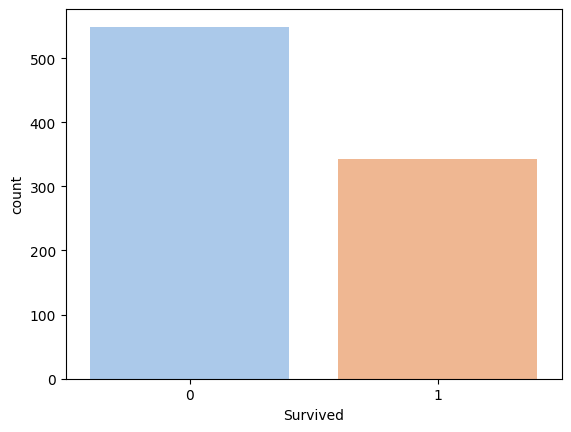

In [26]:
sns.countplot(x='Survived', data= titanic, palette= 'pastel')

<Axes: xlabel='Survived', ylabel='count'>

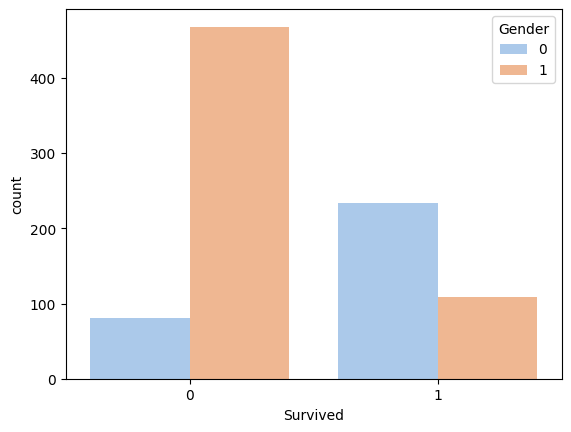

In [27]:
sns.countplot(x='Survived', data= titanic, hue='Gender', palette= 'pastel')
#print the surivial rate depending on the Gender feature

<Axes: >

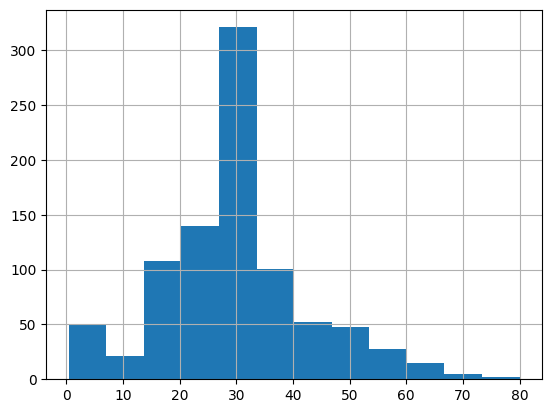

In [28]:
titanic['Age'].hist(bins=12)
#hisograph shows sruvival rate depending on age feature

# building the model
*now we will start working in the model that will predict sruvival chances of the test data*

starting by split the data into train and test sets

In [29]:
titanic

,Survived,Pclass,Age,SibSp,Parch,Fare,Gender,emb_C,emb_S,emb_C,emb_S
0,0,3,22.000000,1,0,7.2500,1,1,0,1,0
1,1,1,38.000000,1,0,71.2833,0,0,1,0,1
2,1,3,26.000000,0,0,7.9250,0,1,0,1,0
3,1,1,35.000000,1,0,53.1000,0,0,0,0,0
4,0,3,35.000000,0,0,8.0500,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,1,0,0,0,0
887,1,1,19.000000,0,0,30.0000,0,0,0,0,0
888,0,3,29.699118,1,2,23.4500,0,0,0,0,0
889,1,1,26.000000,0,0,30.0000,1,0,0,0,0


In [30]:
y = titanic['Survived']
#this is the class feature we want to predict using the data

In [31]:
X = titanic.drop('Survived', axis = 1)
#this way x will store all the columns of dataset after dropping the class label

In [32]:
X

,Pclass,Age,SibSp,Parch,Fare,Gender,emb_C,emb_S,emb_C,emb_S
0,3,22.000000,1,0,7.2500,1,1,0,1,0
1,1,38.000000,1,0,71.2833,0,0,1,0,1
2,3,26.000000,0,0,7.9250,0,1,0,1,0
3,1,35.000000,1,0,53.1000,0,0,0,0,0
4,3,35.000000,0,0,8.0500,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,1,0,0,0,0
887,1,19.000000,0,0,30.0000,0,0,0,0,0
888,3,29.699118,1,2,23.4500,0,0,0,0,0
889,1,26.000000,0,0,30.0000,1,0,0,0,0


In [33]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

now we will split the data using sklearn model

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40 )

In [36]:
X_train.shape

(623, 10)

In [37]:
y_train.shape

(623,)

**training the model**

In [38]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)

In [40]:
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [41]:
y_pred = classifier.predict(X_test)

In [42]:
y_pred
#it's in series form and we will have to turn it into array later

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0])

now we will compare the y_pred with the y_test to see how accurate our model was

In [44]:
y_test.values
#values funtion turn array into series

array([0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1])

# model evaluation
here we will work on inhancing our model's predictions to be more accurate

In [45]:
from sklearn.metrics import confusion_matrix
#shows how many wrong predictions we made

In [46]:
confusion_matrix(y_pred, y_test)
#takes the arguments containing the prediction we made and the acutal data

array([[122,  48],
       [ 34,  64]])

the sum of 26 + 24 is 50 and that's the number of wrong predictions we made

In [47]:
from sklearn.metrics import classification_report

The classification_report function in scikit-learn (sklearn) is used to generate a text report that provides a comprehensive evaluation of a classification model's performance. It is particularly useful for evaluating the quality of predictions made by a classifier on a classification task

In [48]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.78      0.72      0.75       170
           1       0.57      0.65      0.61        98

    accuracy                           0.69       268
   macro avg       0.68      0.69      0.68       268
weighted avg       0.71      0.69      0.70       268

